In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skewtest

In [3]:
# Import the data from the house sales csv file and create a DataFrame
salesdata = pd.read_csv("house_sales.csv")
df = pd.DataFrame(salesdata)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Get the number of rows and columns
df.shape

(21613, 21)

In [5]:
# Get the data type of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Perform descriptive statistics on all columns in the DataFrame
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Get the total number of non null values for each column
non_nulls = df.count()
non_nulls

id               21613
date             21613
price            21613
bedrooms         20479
bathrooms        20545
sqft_living      20503
sqft_lot         20569
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [8]:
# Get the total number of null values for each column
total_nulls = df.isnull().sum()
total_nulls

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Get the total percentage of nulls for each column
percent_col_null = total_nulls / non_nulls * 100
percent_col_null

id               0.000000
date             0.000000
price            0.000000
bedrooms         5.537380
bathrooms        5.198345
sqft_living      5.413842
sqft_lot         5.075599
floors           0.000000
waterfront       0.000000
view             0.000000
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.000000
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [10]:
# Get the total percentage of nulls
sum_of_nulls = total_nulls['bedrooms'] + total_nulls['bathrooms'] + total_nulls['sqft_living'] + total_nulls['sqft_lot']
count = df.count().sum()
total_percent_null = sum_of_nulls / count * 100
print(total_percent_null.round(2), '% of all columns are null')

0.97 % of all columns are null


In [11]:
# Remove all rows with null values
clean_data = df.dropna()
clean_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
# Get the percentage of removed rows
clean_count = clean_data.count().sum()
percent_removed = (1 - (clean_count / count)) * 100
print(percent_removed.round(2), '% of rows were removed')

17.69 % of rows were removed


In [13]:
# Create a subset for data analysis
subset = clean_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']]
subset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode
0,221900.0,3.0,1.00,1180.0,5650.0,1955,98178
1,538000.0,3.0,2.25,2570.0,7242.0,1951,98125
2,180000.0,2.0,1.00,770.0,10000.0,1933,98028
3,604000.0,4.0,3.00,1960.0,5000.0,1965,98136
4,510000.0,3.0,2.00,1680.0,8080.0,1987,98074


In [14]:
# Get the total number of values for each column
subset.count()

price          17618
bedrooms       17618
bathrooms      17618
sqft_living    17618
sqft_lot       17618
yr_built       17618
zipcode        17618
dtype: int64

In [15]:
# Drop duplicate rows
subset.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode
0,221900.0,3.0,1.00,1180.0,5650.0,1955,98178
1,538000.0,3.0,2.25,2570.0,7242.0,1951,98125
2,180000.0,2.0,1.00,770.0,10000.0,1933,98028
3,604000.0,4.0,3.00,1960.0,5000.0,1965,98136
4,510000.0,3.0,2.00,1680.0,8080.0,1987,98074
...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,2009,98103
21609,400000.0,4.0,2.50,2310.0,5813.0,2014,98146
21610,402101.0,2.0,0.75,1020.0,1350.0,2009,98144
21611,400000.0,3.0,2.50,1600.0,2388.0,2004,98027


In [16]:
# Get the total number of values for each column
subset.count()

price          17618
bedrooms       17618
bathrooms      17618
sqft_living    17618
sqft_lot       17618
yr_built       17618
zipcode        17618
dtype: int64

In [17]:
# Get the number of rows and columns for the cleaned data
subset.shape

(17618, 7)

In [18]:
# Perform descriptive statistics on the cleaned data
subset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode
count,1.761800e+04,17618.000000,17618.000000,17618.000000,1.761800e+04,17618.000000,17618.000000
mean,5.416437e+05,3.375071,2.114244,2083.482915,1.514085e+04,1970.824838,98078.217221
std,3.687186e+05,0.936465,0.768893,918.736783,4.228864e+04,29.365434,53.501682
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1900.000000,98001.000000
25%,3.234250e+05,3.000000,1.750000,1430.000000,5.050000e+03,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1974.000000,98065.000000
75%,6.460000e+05,4.000000,2.500000,2550.000000,1.065975e+04,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,2015.000000,98199.000000


In [19]:
# Get the number of unique values in each column
print(subset['price'].nunique(), 'unique home prices')
print(subset['bedrooms'].nunique(), 'unique number of bedrooms')
print(subset['bathrooms'].nunique(), 'unique number of bathrooms')
print(subset['sqft_living'].nunique(), 'unique square footage')
print(subset['sqft_lot'].nunique(), 'unique sqft lots')
print(subset['yr_built'].nunique(), 'unique home build years')
print(subset['zipcode'].nunique(), 'unique zipcodes')

3574 unique home prices
12 unique number of bedrooms
29 unique number of bathrooms
950 unique square footage
8530 unique sqft lots
116 unique home build years
70 unique zipcodes


In [20]:
# If the number of unique values in a column is large, the distribution of 
# values is skewed, or the granularity of the data is too fine-grained, you may 
# need to aggregate the data. Similarly, if the dataset is very large, 
# aggregation may be necessary to reduce the size of the dataset
# for easier analysis or visualization.

### Check the distribution of values in a column
print(subset['price'].value_counts())
print(subset['bedrooms'].value_counts())
print(subset['bathrooms'].value_counts())
print(subset['sqft_living'].value_counts())
print(subset['sqft_lot'].value_counts())
print(subset['yr_built'].value_counts())
print(subset['zipcode'].value_counts())

450000.0     143
350000.0     135
550000.0     126
500000.0     125
400000.0     122
            ... 
2538000.0      1
1445000.0      1
738500.0       1
507200.0       1
402101.0       1
Name: price, Length: 3574, dtype: int64
3.0     7960
4.0     5610
2.0     2267
5.0     1334
6.0      233
1.0      158
7.0       29
8.0       10
0.0        9
9.0        4
10.0       3
33.0       1
Name: bedrooms, dtype: int64
2.50    4409
1.00    3146
1.75    2475
2.25    1681
2.00    1570
1.50    1176
2.75     946
3.00     616
3.50     582
3.25     476
3.75     135
4.00     109
4.50      79
4.25      67
0.75      60
4.75      23
5.00      17
5.25      10
5.50      10
1.25       7
0.00       6
6.00       5
0.50       4
6.25       2
5.75       2
6.50       2
8.00       1
6.75       1
7.50       1
Name: bathrooms, dtype: int64
1300.0    117
1400.0    113
1440.0    112
1800.0    110
1010.0    107
         ... 
5844.0      1
2507.0      1
4530.0      1
5720.0      1
1425.0      1
Name: sqft_living, Length: 

In [21]:
# Perform the skewness test - dataset

### Skewness test from SciPy:
### The skewtest() function in the SciPy library can be used to perform a skewness test on a sample distribution. 
### The test returns a test statistic and a p-value. If the p-value is less than a chosen level of significance (e.g., 0.05), 
### then the null hypothesis (i.e., the distribution is symmetric) can be rejected in favor of the alternative hypothesis
### (i.e., the distribution is skewed).

test_stat, p_value = skewtest(subset)
print(f"Test statistic: {test_stat}, \np-value: {p_value}")

Test statistic: [100.58302547  76.87483269  25.2225359   58.10228741 154.76881213
 -23.57863455  20.83025581], 
p-value: [0.00000000e+000 0.00000000e+000 2.26745788e-140 0.00000000e+000
 0.00000000e+000 6.38556385e-123 2.30228246e-096]


In [22]:
# Check the granularity of the data
print('Min house price:', subset['price'].min(), '\nMax house price:', subset['price'].max(), '\n')
print('Min number of bedrooms:', subset['bedrooms'].min(), '\nMax number of bedrooms:', subset['bedrooms'].max(), '\n')
print('Min number of bathrooms:', subset['bathrooms'].min(), '\nMax number of bathrooms:', subset['bathrooms'].max(), '\n')
print('Min sqft:', subset['sqft_living'].min(), '\nMax sqft:', subset['sqft_living'].max(), '\n')
print('Min sqft lot:', subset['sqft_lot'].min(), '\nMax sqft lot:', subset['sqft_lot'].max(), '\n')
print('Min year built:', subset['yr_built'].min(), '\nMax year built:', subset['yr_built'].max(), '\n')
print('Min zipcode:', subset['zipcode'].min(), '\nMax zipcode:', subset['zipcode'].max(), '\n')

Min house price: 75000.0 
Max house price: 7700000.0 

Min number of bedrooms: 0.0 
Max number of bedrooms: 33.0 

Min number of bathrooms: 0.0 
Max number of bathrooms: 8.0 

Min sqft: 370.0 
Max sqft: 12050.0 

Min sqft lot: 520.0 
Max sqft lot: 1651359.0 

Min year built: 1900 
Max year built: 2015 

Min zipcode: 98001 
Max zipcode: 98199 



In [23]:
# Calculate the skewness of a column
# Skewness from Pandas:
# The skew() function in Pandas can be used to calculate the skewness of a 
# sample distribution. The function returns a value that indicates the degree 
# of skewness. If the value is positive, the distribution is skewed to the 
# right (i.e., it has a long right tail). If the value is negative, the 
# distribution is skewed to the left (i.e., it has a long left tail). If the 
# value is close to zero, the distribution is approximately symmetric.

skewness = subset.skew()
summary = pd.DataFrame({'Skewness': skewness})
summary

,Skewness
price,3.916013
bedrooms,2.245520
bathrooms,0.490866
sqft_living,1.406860
sqft_lot,13.440280
yr_built,-0.455818
zipcode,0.398600


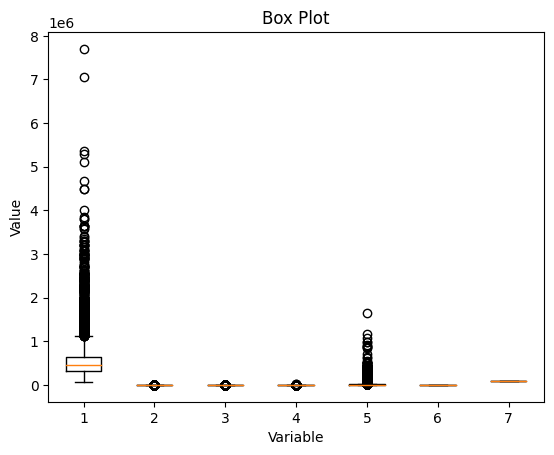

In [24]:
# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(subset)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
plt.show()

In [25]:
# Home price and sqft_lot have many outliers. 

In [26]:
# Normalization is the process of scaling numeric data to a common range. It is 
# a common preprocessing step in machine learning to improve the performance of 
# models that use distance-based measures. In Python, you can perform 
# normalization using various libraries such as Scikit-learn, NumPy, and Pandas.

In [27]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(subset)
normalized_data

array([[1.92655738e-02, 9.09090909e-02, 1.25000000e-01, ...,
        3.10751079e-03, 4.78260870e-01, 8.93939394e-01],
       [6.07213115e-02, 9.09090909e-02, 2.81250000e-01, ...,
        4.07186891e-03, 4.43478261e-01, 6.26262626e-01],
       [1.37704918e-02, 6.06060606e-02, 1.25000000e-01, ...,
        5.74253455e-03, 2.86956522e-01, 1.36363636e-01],
       ...,
       [4.28984918e-02, 6.06060606e-02, 9.37500000e-02, ...,
        5.02774650e-04, 9.47826087e-01, 7.22222222e-01],
       [4.26229508e-02, 9.09090909e-02, 3.12500000e-01, ...,
        1.13154584e-03, 9.04347826e-01, 1.31313131e-01],
       [3.27868852e-02, 6.06060606e-02, 9.37500000e-02, ...,
        3.36798440e-04, 9.39130435e-01, 7.22222222e-01]])

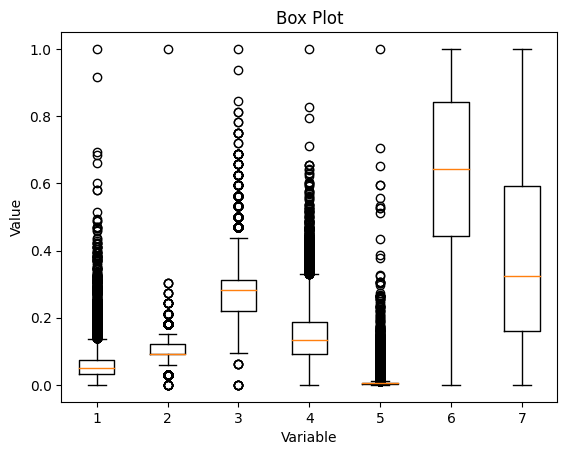

In [28]:
# Create a box plot of Normalized Data
fig, ax = plt.subplots()
ax.boxplot(normalized_data)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
plt.show()